In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting in Jupyter Notebook:
%matplotlib inline

# --- Step 1: Load Cleaned Data ---
df = pd.read_csv("cleaned_ebay_deals.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values(by='timestamp', inplace=True)

Deals per hour:
 hour
1      90
2      60
5     120
6      30
10    150
15    150
20    150
dtype: int64


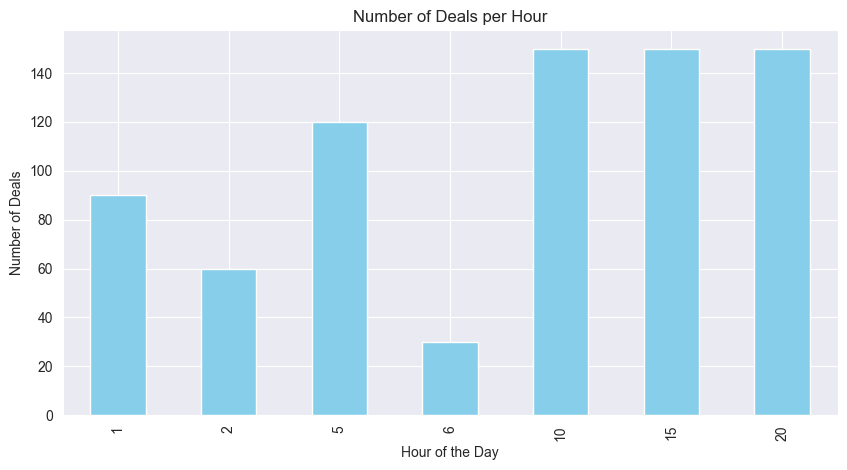

In [2]:
# Extract hour from timestamp
df['hour'] = df['timestamp'].dt.hour

# Count deals per hour
deals_per_hour = df.groupby('hour').size()
print("Deals per hour:\n", deals_per_hour)

# Plot the counts as a bar chart
plt.figure(figsize=(10, 5))
deals_per_hour.plot(kind='bar', color='skyblue')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Deals")
plt.title("Number of Deals per Hour")
plt.show()

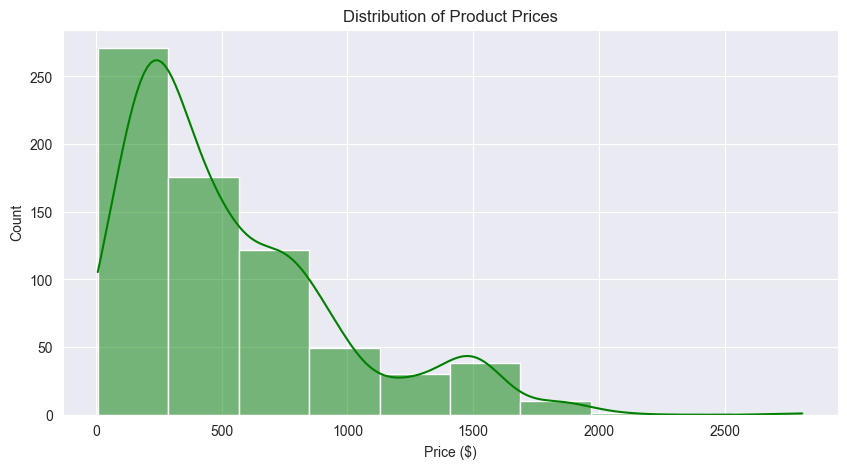

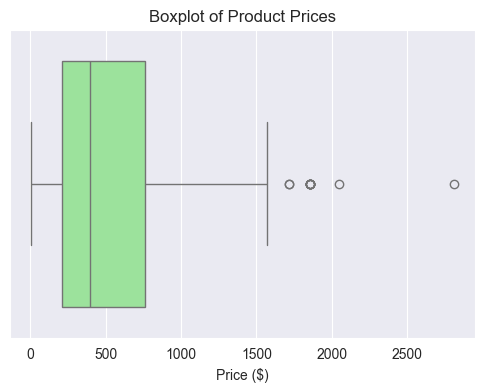

In [3]:
# Histogram of product prices
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=10, kde=True, color='green')
plt.xlabel("Price ($)")
plt.title("Distribution of Product Prices")
plt.show()

# Boxplot for detecting outliers in price
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['price'], color='lightgreen')
plt.xlabel("Price ($)")
plt.title("Boxplot of Product Prices")
plt.show()


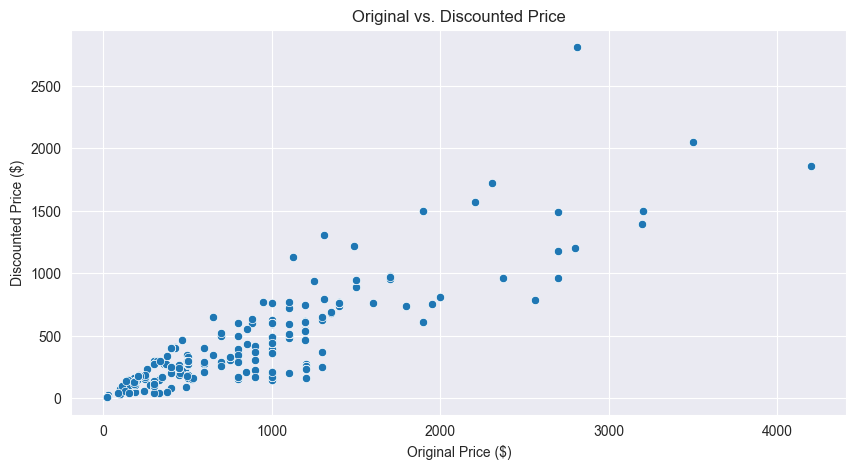

In [4]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='original_price', y='price', data=df)
plt.xlabel("Original Price ($)")
plt.ylabel("Discounted Price ($)")
plt.title("Original vs. Discounted Price")
plt.show()


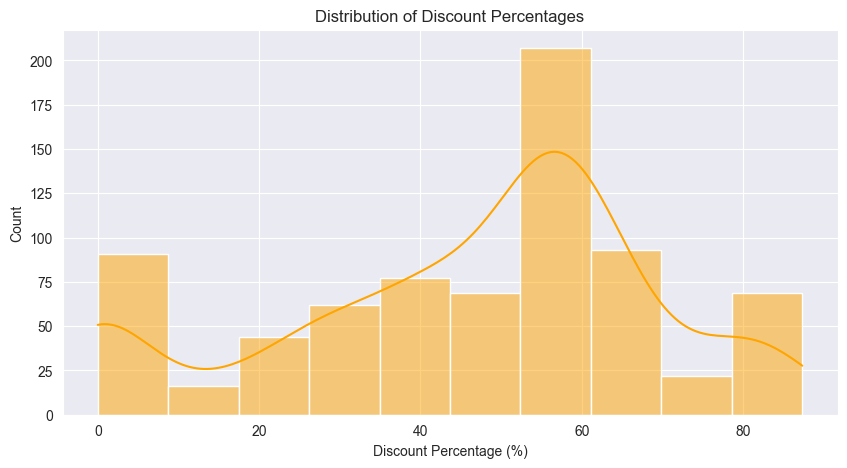

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['discount_percentage'], bins=10, kde=True, color='orange')
plt.xlabel("Discount Percentage (%)")
plt.title("Distribution of Discount Percentages")
plt.show()


Shipping Options:
 shipping
Shipping info unavailable    510
Free shipping                240
Name: count, dtype: int64


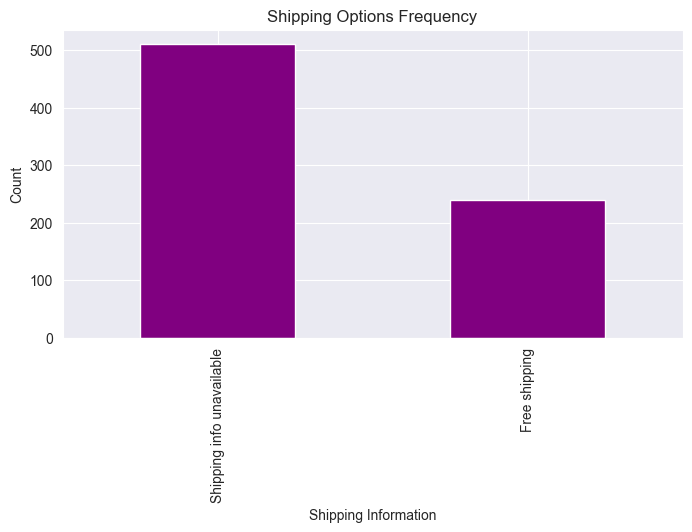

In [6]:
# Count shipping options
shipping_counts = df['shipping'].value_counts()
print("Shipping Options:\n", shipping_counts)

plt.figure(figsize=(8, 4))
shipping_counts.plot(kind='bar', color='purple')
plt.xlabel("Shipping Information")
plt.ylabel("Count")
plt.title("Shipping Options Frequency")
plt.show()


Keyword Frequency:
 {'Apple': np.int64(287), 'Samsung': np.int64(88), 'Laptop': np.int64(126), 'iPhone': np.int64(228), 'Tablet': np.int64(3), 'Gimbal': np.int64(0)}


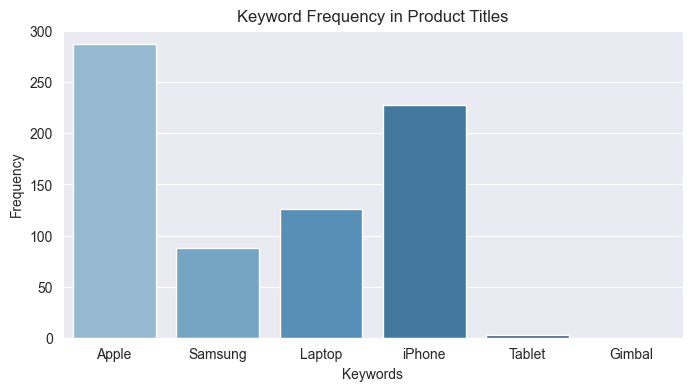

In [7]:
# Define keywords to look for in product titles
keywords = ['Apple', 'Samsung', 'Laptop', 'iPhone', 'Tablet', 'Gimbal']

# Count occurrences of each keyword in the 'title' column (case-insensitive)
keyword_counts = {word: df['title'].str.contains(word, case=False, na=False).sum() for word in keywords}
print("Keyword Frequency:\n", keyword_counts)
# Convert the dictionary to a DataFrame
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['keyword', 'frequency'])

# Plot using seaborn with hue set to 'keyword' and then disable the legend
plt.figure(figsize=(8, 4))
sns.barplot(x='keyword', y='frequency', data=keyword_df, hue='keyword', dodge=False, palette='Blues_d')
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.title("Keyword Frequency in Product Titles")
plt.legend([],[], frameon=False)  # Disable the legend
plt.show()

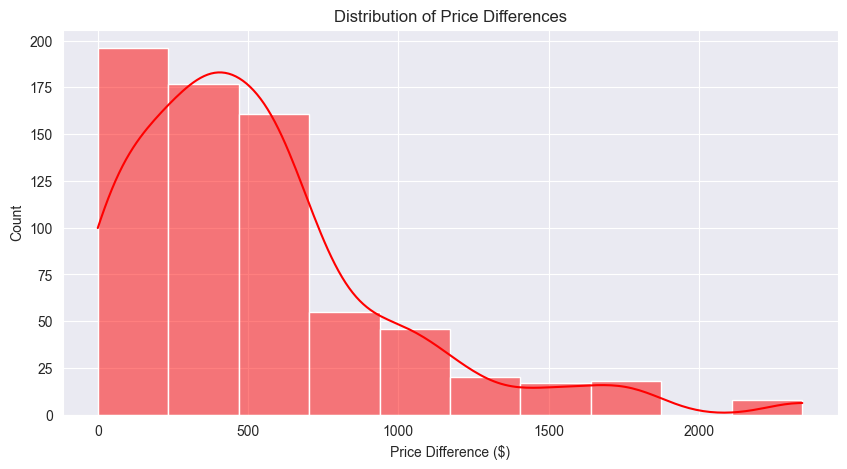

In [8]:
# Calculate the price difference (absolute discount amount)
df['price_difference'] = df['original_price'] - df['price']

plt.figure(figsize=(10, 5))
sns.histplot(df['price_difference'], bins=10, kde=True, color='red')
plt.xlabel("Price Difference ($)")
plt.title("Distribution of Price Differences")
plt.show()


In [9]:
# Sort the data by discount percentage in descending order and select the top 5 deals
top_deals = df.sort_values(by='discount_percentage', ascending=False).head(5)
print("Top 5 Deals by Discount Percentage:\n", top_deals[['title', 'price', 'original_price', 'discount_percentage']])

Top 5 Deals by Discount Percentage:
                                                  title  price  original_price  \
697         Samsung Galaxy Watch4 44mm R870 GPS - Good  37.99          299.99   
346  ASUS Zenfone V V520KL A006 32GB Verizon - Exce...  41.95          329.00   
165  ASUS Zenfone V V520KL A006 32GB Verizon - Exce...  41.95          329.00   
226  ASUS Zenfone V V520KL A006 32GB Verizon - Exce...  41.95          329.00   
316  ASUS Zenfone V V520KL A006 32GB Verizon - Exce...  41.95          329.00   

     discount_percentage  
697                87.34  
346                87.25  
165                87.25  
226                87.25  
316                87.25  
